In [67]:
# Suppress Warning messages
import warnings
warnings.simplefilter(action='ignore')

In [68]:
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [69]:
PROBLEM_NAME = 'FourPeaks'
ALGORITHM_NAME = 'RHC'

In [70]:
PROBLEM_SIZE = 30
T_PCT = '0.4'

In [71]:
out_dir = f'metrics'
os.makedirs(out_dir, exist_ok=True)

In [72]:
all_df = pd.read_csv(f'metrics/{ALGORITHM_NAME.lower()}.csv')

In [73]:
all_df.columns

Index(['Iteration', 'Time', 'Fitness', 'FEvals', 'Restarts', 'max_iters',
       'current_restart', 'problem_size', 't_pct', 'max_attempts',
       'run_number', 'group_timestamp'],
      dtype='object')

In [74]:
all_df.sort_values(by='Restarts', inplace=True)

In [75]:
print(all_df['Restarts'].unique())

[  1  10  20  50 100]


In [76]:
# all_df = all_df[all_df['Temperature'].isin([1, 100, 10000])]

In [77]:
# all_df['X'] = all_df.apply(lambda row: f"Temp={row['Temperature']}, DecayType={row['decay_type']}", axis=1)
all_df['X'] = all_df.apply(lambda row: f"Restarts={int(row['Restarts'])}", axis=1)

In [78]:
all_df['X'].unique()

array(['Restarts=1', 'Restarts=10', 'Restarts=20', 'Restarts=50',
       'Restarts=100'], dtype=object)

In [79]:
def get_color(X):
    if X == 'Restarts=1':
        return 'red'
    elif X == 'Restarts=10':
        return 'blue'
    elif X == 'Restarts=20':
        return 'orange'
    elif X == 'Restarts=50':
        return 'purple'
    elif X == 'Restarts=100':
        return 'green'
    else:
        raise Exception(f'Unknown X: {X}')

In [80]:
metrics = {}

for group in all_df['X'].unique():
    df = all_df[all_df['X'] == group]
    assert(len(df['group_timestamp'].unique()) == 1)
    last_iter = df['Iteration'].max()
    metrics[group] = {
        'iter': [],
        'fitness_mean': [],
        'fitness_std': [],
    }
    for iter_i in range(1, last_iter+1):
        iter_df = df[df['Iteration'] == iter_i]
        metrics[group]['iter'].append(iter_i)
        metrics[group]['fitness_mean'].append(iter_df['Fitness'].mean())
        metrics[group]['fitness_std'].append(iter_df['Fitness'].std())

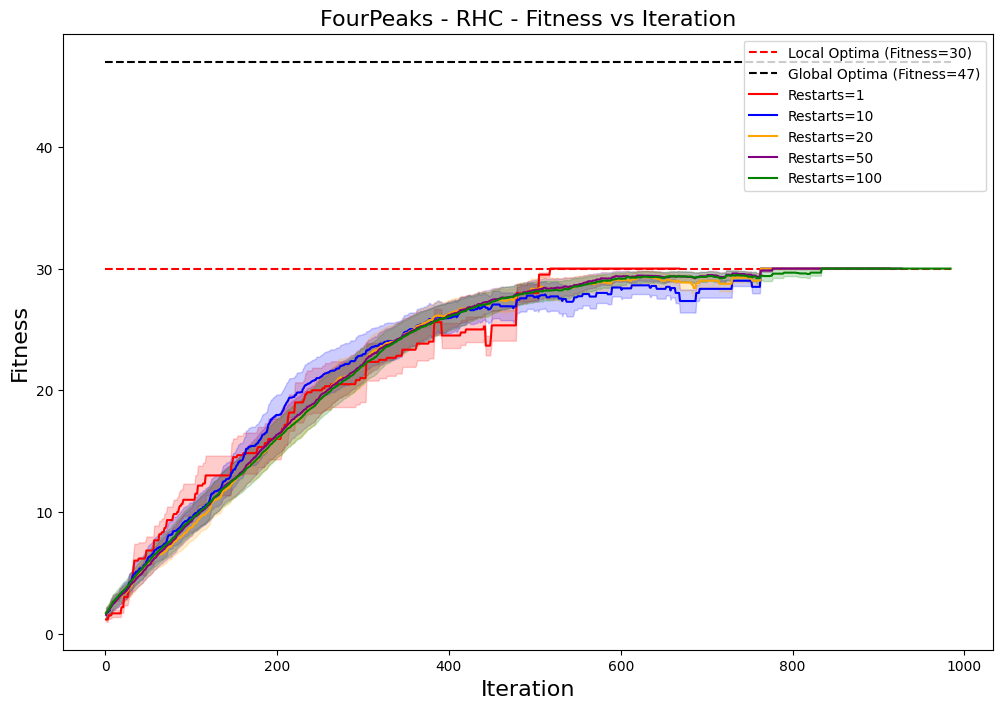

In [81]:
fontsize = 16
plt.figure(figsize=(12, 8))
last_iter = all_df['Iteration'].max()
plt.hlines(30, 0, last_iter, color='red', linestyle='dashed', alpha=1.0, label='Local Optima (Fitness=30)')
plt.hlines(47, 0, last_iter, color='black', linestyle='dashed', alpha=1.0, label='Global Optima (Fitness=47)')
for group in metrics:
    linestyle = '-'
    color = get_color(group)
    plt.plot(metrics[group]['iter'], metrics[group]['fitness_mean'], label=group, color=color, linestyle=linestyle)
    mean = np.array(metrics[group]['fitness_mean'])
    std = np.array(metrics[group]['fitness_std']) / 4
    lower = mean - std
    upper = mean + std 
    plt.fill_between(metrics[group]['iter'], lower, upper, alpha=0.2, color=color)
plt.title(f'{PROBLEM_NAME} - {ALGORITHM_NAME} - Fitness vs Iteration', fontsize=fontsize)
plt.xlabel('Iteration', fontsize=fontsize)
plt.ylabel('Fitness', fontsize=fontsize)
# plt.xlim(0, 4000)
plt.legend()
plt.savefig(f'{out_dir}/{PROBLEM_NAME}_{ALGORITHM_NAME.lower()}_fitness_vs_iteration.png')